In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
distortion_coefficients = np.array([-0.22532, 0.03475, -0.00030, -0.00034])
focal_length = np.array([285.9229, 281.8986])
principal_point = np.array([421.1283, 403.1331])
image_size = np.array([848, 800])

In [3]:
#generate mesh grid
n = 8
scale = 50
x = np.arange(int(image_size[0] / scale))
y = np.arange(int(image_size[1] / scale))
# 3×3の格子点を作成
X, Y = np.meshgrid(x, y)
pt = np.c_[X.ravel(), Y.ravel()].T * scale

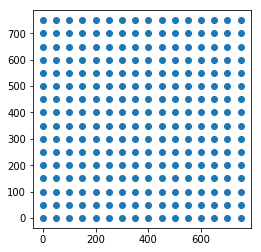

In [4]:
im = plt.subplot()
im.set_aspect('equal')
im.scatter(pt[0], pt[1])

In [5]:
def normalize(focal_length, principal_point, pt):
    return (pt - principal_point.reshape(2,1)) / focal_length.reshape(2,1)

def denormalize(focal_length, principal_point, uv):
    return uv * focal_length.reshape(2,1) + principal_point.reshape(2,1)

def distortion(dist, pts):
    k1 = dist[0]
    k2 = dist[1]
    p1 = dist[2]
    p2 = dist[3]
    x = pts[0]
    y = pts[1]
    xx = x * x
    yy = y * y
    xy = x * y
    xx_yy = xx + yy
    rad_dist = k1 * xx_yy + k2 * xx_yy * xx_yy
    d_x = x * rad_dist + 2.0 * p1 * xy + p2 * (xx_yy + 2 * xx) 
    d_y = y * rad_dist + 2.0 * p2 * xy + p1 * (xx_yy + 2 * yy)  
    return np.c_[d_x,d_y].T

def undistortion(dist, duv):
    mx_u = distortion(distortion_coefficients, duv)
    for i in range(n):
        mx_u = duv - distortion(distortion_coefficients, mx_u)
    return mx_u
    

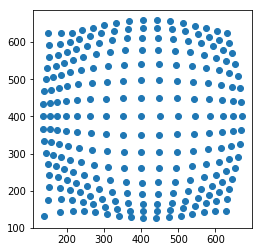

In [6]:
uv = normalize(focal_length, principal_point, pt)
duv = uv + distortion(distortion_coefficients, uv)
dpt = denormalize(focal_length, principal_point, duv)

im = plt.subplot()
im.set_aspect('equal')
im.scatter(dpt[0], dpt[1])

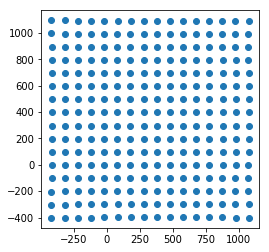

In [7]:
e_uv = uv + undistortion(distortion_coefficients, duv)
ept = denormalize(focal_length, principal_point, e_uv)

im = plt.subplot()
im.set_aspect('equal')
im.scatter(ept[0], ept[1])